## **CAMPANHA NACIONAL DE VACINAÇÃO CONTRA A *COVID-19***

<div style="text-align: justify">
<p>O Ministério da Saúde, por meio do Sistema de Informação do Programa Nacional de Imunizações (SI-PNI), disponibilizou os registros de vacinação contra Covid-19, sem identificação do cidadão (anonimizados), contidos na Rede Nacional de Dados em Saúde (RNDS), desde o início da Campanha. São dados disponibilizados pela SI-PNI, e-SUS APS e dos sistemas próprios de estados e municípios que estão devidamente integrados com a RNDS.</p>
</div>

In [1]:
#IMPORTAÇÃO DE BIBLIOTECAS
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

#IMPORTAÇÃO DO DATASET
datasetCovid = pd.read_csv('./datasetCovid.csv', sep=';', encoding='utf-8')
datasetCovid.head(3)

,document_id,paciente_id,paciente_idade,paciente_datanascimento,paciente_enumsexobiologico,paciente_racacor_codigo,paciente_racacor_valor,paciente_endereco_coibgemunicipio,paciente_endereco_copais,paciente_endereco_nmmunicipio,...,vacina_lote,vacina_fabricante_nome,vacina_fabricante_referencia,vacina_dataaplicacao,vacina_descricao_dose,vacina_codigo,vacina_nome,sistema_origem,data_importacao_rnds,id_sistema_origem
0,7460449e-f7d3-48a6-af2e-88297214a224-i0b0,45592373aacdc61e247dc1f4140ef0b2516ef3b1178348...,23,1998-04-04,F,4,AMARELA,140028.0,10.0,IRACEMA,...,216VCD193Z,ASTRAZENECA/FIOCRUZ,Organization/33781055000135,2021-10-06,2ª Dose,85,COVID-19 ASTRAZENECA/FIOCRUZ - COVISHIELD,Novo PNI,2021-10-21T20:43:23.000Z,16341
1,ea6d111e-a573-42b6-a1a9-d2c9fa63598e-i0b0,205cfc50addd3d4614aa52dcad92dbc0442f764ddd713b...,32,1989-01-20,M,4,AMARELA,140047.0,10.0,RORAINOPOLIS,...,211A21A,JANSSEN,Organization/00394544000851,2021-07-13,Dose,88,COVID-19 JANSSEN - Ad26.COV2.S,Novo PNI,2021-07-14T16:32:24.000Z,16341
2,b03891bd-f222-49c3-987a-fe75c513da31-i0b0,e15944112f608c77e5f1e2159797de25570a7c300dfebf...,23,1998-08-25,F,99,SEM INFORMACAO,NaN,NaN,NaN,...,219VCD266W,ASTRAZENECA/FIOCRUZ,Organization/33781055000135,2021-10-20,2ª Dose,85,COVID-19 ASTRAZENECA/FIOCRUZ - COVISHIELD,Novo PNI,2021-10-21T20:17:40.000Z,16341


In [2]:
#PREENCHENDO OS VALUES "NaN" COM VALOR "SEM INFORMACAO"
datasetCovid.fillna('SEM INFORMACAO', inplace=True)
datasetCovid.head(3)

,document_id,paciente_id,paciente_idade,paciente_datanascimento,paciente_enumsexobiologico,paciente_racacor_codigo,paciente_racacor_valor,paciente_endereco_coibgemunicipio,paciente_endereco_copais,paciente_endereco_nmmunicipio,...,vacina_lote,vacina_fabricante_nome,vacina_fabricante_referencia,vacina_dataaplicacao,vacina_descricao_dose,vacina_codigo,vacina_nome,sistema_origem,data_importacao_rnds,id_sistema_origem
0,7460449e-f7d3-48a6-af2e-88297214a224-i0b0,45592373aacdc61e247dc1f4140ef0b2516ef3b1178348...,23,1998-04-04,F,4,AMARELA,140028,10,IRACEMA,...,216VCD193Z,ASTRAZENECA/FIOCRUZ,Organization/33781055000135,2021-10-06,2ª Dose,85,COVID-19 ASTRAZENECA/FIOCRUZ - COVISHIELD,Novo PNI,2021-10-21T20:43:23.000Z,16341
1,ea6d111e-a573-42b6-a1a9-d2c9fa63598e-i0b0,205cfc50addd3d4614aa52dcad92dbc0442f764ddd713b...,32,1989-01-20,M,4,AMARELA,140047,10,RORAINOPOLIS,...,211A21A,JANSSEN,Organization/00394544000851,2021-07-13,Dose,88,COVID-19 JANSSEN - Ad26.COV2.S,Novo PNI,2021-07-14T16:32:24.000Z,16341
2,b03891bd-f222-49c3-987a-fe75c513da31-i0b0,e15944112f608c77e5f1e2159797de25570a7c300dfebf...,23,1998-08-25,F,99,SEM INFORMACAO,SEM INFORMACAO,SEM INFORMACAO,SEM INFORMACAO,...,219VCD266W,ASTRAZENECA/FIOCRUZ,Organization/33781055000135,2021-10-20,2ª Dose,85,COVID-19 ASTRAZENECA/FIOCRUZ - COVISHIELD,Novo PNI,2021-10-21T20:17:40.000Z,16341


In [3]:
#REMOVENDO FABRICANTES COM MENOS DOSES APLICADAS
datasetCovid.drop(datasetCovid.loc[datasetCovid['vacina_fabricante_nome']=='MINISTERIO DA SAUDE'].index, inplace=True)
datasetCovid.drop(datasetCovid.loc[datasetCovid['vacina_fabricante_nome']=='FUNDACAO OSWALDO CRUZ'].index, inplace=True)
datasetCovid.drop(datasetCovid.loc[datasetCovid['vacina_fabricante_nome']=='FUNDACAO BUTANTAN'].index, inplace=True)
datasetCovid.drop(datasetCovid.loc[datasetCovid['vacina_fabricante_nome']=='SINOVAC LIFE SCIENCE CO LTD'].index, inplace=True)
datasetCovid.drop(datasetCovid.loc[datasetCovid['vacina_fabricante_nome']=='BioNTech/Fosun Pharma/Pfizer'].index, inplace=True)

In [4]:
#COLUNAS UTILIZADAS
colSelected = datasetCovid[['vacina_codigo', 'vacina_grupoatendimento_nome', 'paciente_id',
                            'estabelecimento_municipio_nome', 'estalecimento_nofantasia', 
                            'vacina_fabricante_nome', 'vacina_descricao_dose']]

In [5]:
#INFORMAÇÕES DE ESTATÍSTICA DESCRITIVAS, COMO: MÉDIA, DESVIO PADRÃO, MÁXIMO, MÍNIMO E OUTRAS TENDÊNCIAS CENTRAIS
datasetCovid.describe()

,paciente_idade,paciente_racacor_codigo,estabelecimento_valor,estabelecimento_municipio_codigo,vacina_grupoatendimento_codigo,vacina_codigo,id_sistema_origem
count,538289.000000,538289.000000,5.382890e+05,538289.000000,538289.000000,538289.000000,538289.000000
mean,39.842657,18.899316,7.212551e+06,140016.132947,1885.855884,86.116036,16359.137190
std,17.580234,35.535403,2.880256e+06,13.907559,39460.369248,1.008978,249.776739
min,2.000000,1.000000,7.848400e+04,140002.000000,0.000000,85.000000,16341.000000
25%,25.000000,3.000000,5.572320e+06,140010.000000,201.000000,85.000000,16341.000000
50%,38.000000,3.000000,9.193235e+06,140010.000000,201.000000,86.000000,16341.000000
75%,52.000000,4.000000,9.193235e+06,140015.000000,206.000000,87.000000,16341.000000
max,123.000000,99.000000,9.635599e+06,140070.000000,999999.000000,89.000000,21448.000000


#### **QUANTIDADE DE PACIENTES VACINADOS POR GRUPO DE ATENDIMENTO**

In [6]:
serviceGroups = colSelected['vacina_grupoatendimento_nome']
serviceGroups.value_counts().sort_index()

Acadêmicos/estudantes em estágio em estabelecimentos de saúde     439
Agente Comunitário de Saúde - ACS                                  22
Agente de Combate a Endemias - ACE                                 18
Assistente Social                                                 353
Auxiliar de Enfermagem                                            854
                                                                 ... 
Trabalhadores Portuários                                            4
Técnico de Enfermagem                                            6006
Técnico de Odontologia                                            417
Técnico de Veterinário                                             35
Técnico em Saúde Bucal - TSB                                        1
Name: vacina_grupoatendimento_nome, Length: 83, dtype: int64

### **QUADRO DE VACINAÇÃO**

> No quadro a seguir destacam-se os estabelecimentos nos quais estão disponibilizadas as vacinas contra COVID-19 em cada município, seu fabricante, quantidade de doses e o estabelecimento onde os pacientes foram devidamente imunizados.

In [7]:
colSelected[['estabelecimento_municipio_nome', 'estalecimento_nofantasia', 
             'vacina_fabricante_nome', 'paciente_id', 'vacina_descricao_dose']].groupby([
             'estabelecimento_municipio_nome', 'estalecimento_nofantasia', 
             'vacina_fabricante_nome', 'vacina_descricao_dose']).count()

paciente_id
estabelecimento_municipio_nome estalecimento_nofantasia                     vacina_fabricante_nome vacina_descricao_dose             
ALTO ALEGRE                    CENTRO DE SAUDE AGENOR PAULO DA SILVA        ASTRAZENECA            1ª Dose                         15
                                                                                                   2ª Dose                         29
                                                                            ASTRAZENECA/FIOCRUZ    1ª Dose                        252
                                                                                                   2ª Dose                        126
                                                                                                   Reforço                          6
...                                                                                                                               ...
UIRAMUTA                       UNIDADE SAUDE DA FAMILIA UIRAMUTA JOSE JULIO ASTRAZENECA/FIOCRUZ    1ª Dose                        396
                                                                                                   2ª Dose                         65
                                                                            PFIZER                 1ª Dose                        113
                                                                            SINOVAC/BUTANTAN       1ª Dose                        183
                                                                                                   2ª Dose                        173

[721 rows x 1 columns]

## **TOTAL DE DOSES APLICADAS POR TIPO DE VACINA**

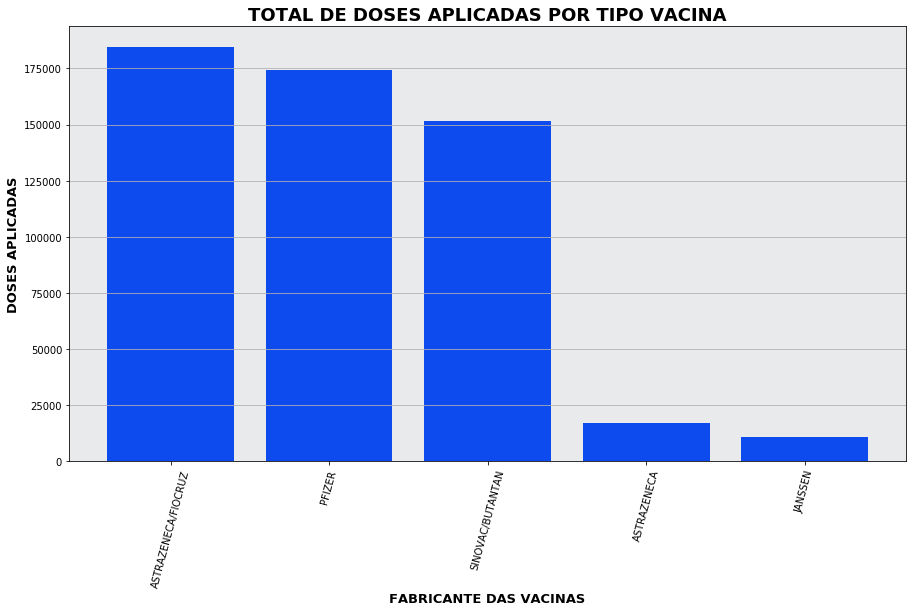

In [8]:
groupsSelected = colSelected['vacina_fabricante_nome']
groupsSum = groupsSelected.value_counts()
x = groupsSum.index
y = groupsSum
 
plt.figure(figsize=(15, 8))
ax = plt.axes()
ax.set_facecolor('#e9eaeb')
plt.xticks(rotation=75)
plt.xlabel('FABRICANTE DAS VACINAS', fontweight='bold', fontsize=13)
plt.ylabel('DOSES APLICADAS', fontweight='bold', fontsize=13)
plt.title('TOTAL DE DOSES APLICADAS POR TIPO VACINA', fontweight='bold', fontsize=18)
plt.bar(x, y, color='#0e4bef')
plt.grid(axis='y')
 
plt.show()

---

### ***DIVIDINDO OS DADOS DE TREINO E TESTE***

In [9]:
featureNames = ['F', 'vacina_codigo']
datasetCovid['F'] = datasetCovid['paciente_enumsexobiologico'].map({'M': 0, 'F': 1})
datasetCovid.dropna(subset=featureNames, inplace=True)

x = datasetCovid[featureNames].to_numpy()
y = datasetCovid['vacina_codigo'].to_numpy()

xTrain, xTest, yTrain, yTest = train_test_split(x, y, test_size=0.25, random_state=123)

print('Tamanho do xTrain: ', xTrain.shape, '\n')
print('Tamanho do xTest: ', xTest.shape, '\n')
print('Tamanho do yTrain: ', yTrain.shape, '\n')
print('Tamanho do yTest: ', yTest.shape, '\n')

Tamanho do xTrain:  (403716, 2) 

Tamanho do xTest:  (134572, 2) 

Tamanho do yTrain:  (403716,) 

Tamanho do yTest:  (134572,) 



### ***TREINANDO UM ESTIMADOR DE APRENDIZAGEM SUPERVISIONADA***

In [10]:
clf = LogisticRegression(n_jobs=-1, random_state=123)
clf.fit(xTrain, yTrain)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=-1, penalty='l2',
                   random_state=123, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

### ***VERIFICANDO O DESEMPENHO DO ESTIMADOR***

In [11]:
yTrainTrue = yTrain
yTrainPred = clf.predict(xTrain)
yTestTrue = yTest
yTestPred = clf.predict(xTest)

print(f"Acurácia de Treino: {round(accuracy_score(yTrainTrue, yTrainPred), 2)}")
print(f"Acurácia de Teste: {round(accuracy_score(yTestTrue, yTestPred), 2)}")

Acurácia de Treino: 0.95
Acurácia de Teste: 0.95
